## Import necessary modules

In [1]:
import numpy as np 
from numpy.linalg import norm
import matplotlib.pyplot as plt
from tabulate import tabulate
from supports import *

## Node 


In [2]:
node_total=int(input("How many node? : "))
ndofs=2*node_total
node_values={}
degrees_of_freedom={}
X=[]
Y=[]
for i in range(1,node_total+1):
    x=float(input(f"x{i}= "))
    y=float(input(f"y{i}= "))
    X.append(x)
    Y.append(y)
    node_values[i]=x,y
    degrees_of_freedom[i]=2*i-1,2*i
print(node_values)
print(degrees_of_freedom)


{1: (0.0, 0.0), 2: (40.0, 0.0), 3: (40.0, 30.0), 4: (0.0, 30.0)}
{1: (1, 2), 2: (3, 4), 3: (5, 6), 4: (7, 8)}


## Element

In [3]:
member=int(input("How many member? : "))
member_values={}
elements={}
From_node=[]
To_node=[]

plot_x1=[]
plot_x2=[]
plot_y1=[]
plot_y2=[]
plot_final={}

for i in range(1,member+1):
    node1 = int(input(f"Member {i} (From Node) = "))
    node2 = int(input(f"Member {i} (To Node) = "))
    for k,v in node_values.items():
        if node1==k:
            From_node=v
            plot_x1=v[0]
            plot_y1=v[1]
        elif node2==k:
            To_node=v
            plot_x2=v[0]
            plot_y2=v[1]
        plot_final[i]=(plot_x1,plot_x2),(plot_y1,plot_y2)
        member_values[i]=From_node,To_node
    elements[i]=node1,node2

print(elements)
print(member_values)
print(plot_final)

{1: (1, 2), 2: (3, 2), 3: (1, 3), 4: (4, 3)}
{1: ((0.0, 0.0), (40.0, 0.0)), 2: ((40.0, 30.0), (40.0, 0.0)), 3: ((0.0, 0.0), (40.0, 30.0)), 4: ((0.0, 30.0), (40.0, 30.0))}
{1: ((0.0, 40.0), (0.0, 0.0)), 2: ((40.0, 40.0), (30.0, 0.0)), 3: ((0.0, 40.0), (0.0, 30.0)), 4: ((0.0, 40.0), (30.0, 30.0))}


## Graph 

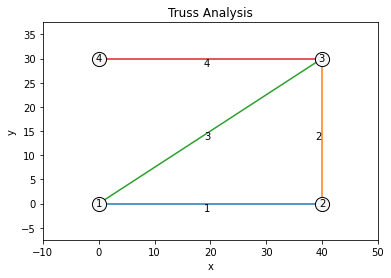

In [4]:

max_X=max(X)
max_Y=max(Y)

fig,ax=plt.subplots()
ax.set_title('Truss Analysis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.margins(0.25)

ax.scatter(X,Y,c='whitesmoke',s=200,edgecolors='k',zorder=9)
for i,j in enumerate(X):
    ax.annotate(i+1,(X[i],Y[i]),zorder=10,ha='center',va='center')

for k,v in plot_final.items():
    ax.plot(v[0],v[1])
    xy=sum(v[0])/2,sum(v[1])/2
    ax.annotate(k,xy,horizontalalignment='right', verticalalignment='top')

plt.show()

## Supports define


[1, 2, 4, 7, 8]
[1, 2, 4]


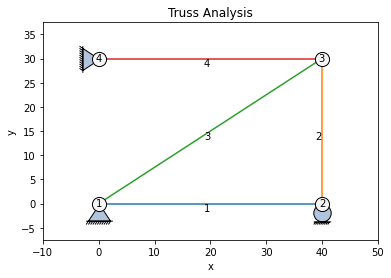

In [19]:
roller_support=rollerSupport()
pinned_support=pinnedSupport()
#################################################################
fig,ax=plt.subplots()
ax.set_title('Truss Analysis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.margins(0.25)

ax.scatter(X,Y,c='whitesmoke',s=200,edgecolors='k',zorder=9)
for i,j in enumerate(X):
    ax.annotate(i+1,(X[i],Y[i]),zorder=10,ha='center',va='center')

for k,v in plot_final.items():
    ax.plot(v[0],v[1])
    xy=sum(v[0])/2,sum(v[1])/2
    ax.annotate(k,xy,horizontalalignment='right', verticalalignment='top')
#####################################################################
restrained_dofs=[]
support_node=[]
support=int(input('How many support? : '))
for i in range(1, support+1):
    node=int(input("Node number : "))
    support_type=int(input("""    1) Pinned Support
    2) Horizontal Roller Support
    3) Vertical Roller Supoort
    Choose: """))
    support_node.append(node)
    p=node_values[node][0]
    q=node_values[node][1]
    if support_type==1:
        restrained_dofs.append(2*node-1)
        restrained_dofs.append(2*node)
        if q>0: 
            if p==0:
                pinned_support=pinned_support.transformed(matplotlib.transforms.Affine2D().rotate_deg(270))
                ax.plot(p,q,marker=pinned_support, color='k', markerfacecolor='lightsteelblue', markersize=40)
            elif p==max_X:
                special=pinnedSupport().transformed(matplotlib.transforms.Affine2D().rotate_deg(90))
                ax.plot(p,q,marker=special, color='k', markerfacecolor='lightsteelblue', markersize=40)
        else:
            ax.plot(p,q,marker=pinned_support, color='k', markerfacecolor='lightsteelblue', markersize=40)

    elif support_type==2:
        restrained_dofs.append(2*node)
        #Bottom
        if q<max_Y/2:
            ax.plot(p,q,marker=roller_support, color='k', markerfacecolor='lightsteelblue', markersize=40)
        #Top
        else:
            roller_support = roller_support.transformed(matplotlib.transforms.Affine2D().rotate_deg(180))
            ax.plot(p,q,marker=roller_support, color='k', markerfacecolor='lightsteelblue', markersize=40)  

    elif support_type==3:
        restrained_dofs.append(2*node-1)
            #Left
        if p<max_X/2:
            roller_support = roller_support.transformed(matplotlib.transforms.Affine2D().rotate_deg(90))
            ax.plot(p,q,marker=roller_support, color='k', markerfacecolor='lightsteelblue', markersize=40) 
        #Right
        else:
            roller_support = roller_support.transformed(matplotlib.transforms.Affine2D().rotate_deg(270))
            ax.plot(p,q,marker=roller_support, color='k', markerfacecolor='lightsteelblue', markersize=40)

print(restrained_dofs)
print(support_node)

plt.show()

## Force define

{1: (0, 0), 2: (20000.0, 0.0), 3: (0.0, -25000.0), 4: (0, 0)}
{3: 20000.0, 4: 0.0}


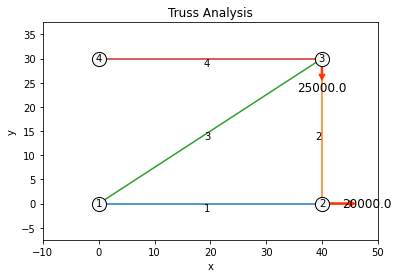

In [27]:
#################################################################
fig,ax=plt.subplots()
ax.set_title('Truss Analysis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.margins(0.25)

ax.scatter(X,Y,c='whitesmoke',s=200,edgecolors='k',zorder=9)
for i,j in enumerate(X):
    ax.annotate(i+1,(X[i],Y[i]),zorder=10,ha='center',va='center')

for k,v in plot_final.items():
    ax.plot(v[0],v[1])
    xy=sum(v[0])/2,sum(v[1])/2
    ax.annotate(k,xy,horizontalalignment='right', verticalalignment='top')
#####################################################################
support_force={}
forces={}
for i in range(1,node_total+1):
    forces[i]=0,0

force_number=int(input('Total number of nodal loads : '))
for i in range(1,force_number+1):
    node=int(input("Node number : "))
    magnitude=float(input("Enter magnitude : "))
    angle=float(input("Enter angle(in degree) : "))

    force_x=np.around((np.cos(np.radians(angle)))*magnitude,decimals=10)
    force_y=np.around((np.sin(np.radians(angle)))*magnitude,decimals=10)
    forces[node]=force_x,force_y

    if node in support_node:
        support_force[node*2-1]=force_x
        support_force[node*2]=force_y

    p=node_values[node][0]
    q=node_values[node][1]

    ax.annotate("", 
        xy=(p+(max_X*.15)*np.cos(np.radians(angle)), q+(max_Y*.15)*np.sin(np.radians(angle))), 
        xytext=(p, q),
        arrowprops=dict(color='#ff3300', width=1.5, headwidth=6,headlength=6, shrink=.005))

    ax.text(p+(max_X*.2)*np.cos(np.radians(angle)), q+(max_Y*.2)*np.sin(np.radians(angle)),
        f'{magnitude}',
        ha='center',va='center',color='k',fontsize=12,zorder=20)

print(forces)
print(support_force)

plt.show()

## Add properties


In [28]:
properties={}
properties_list={}
properties_number=int(input("Number of property : "))

if properties_number==1:
    stiffness=float(input('Modulus of elasticity of the material :'))
    area=float(input('Cross sectional area of the material : '))
    for i in range(1,member+1):
        properties[i]=stiffness,area
else:
    for i in range(1,properties_number+1):
        stiffness=float(input('Modulus of elasticity of the material :'))
        area=float(input('Cross sectional area of the material : '))
        properties_list[i]=stiffness,area

    print(properties_list)
    for i in range(1,member+1):
        element=int(input('Choose element to change properties : '))
        number=int(input('Insert properties number : '))
        properties[element]=properties_list[number]


print(properties)

assert len(properties) == len(member_values)
assert len(forces) == len(node_values)
assert len(restrained_dofs) < ndofs

{1: (29500000.0, 1.0), 2: (29500000.0, 1.0), 3: (29500000.0, 1.0), 4: (29500000.0, 1.0)}


## Calcultaion start


In [34]:
x_axis=np.array([1,0])
y_axis=np.array([0,1])

K=np.zeros((ndofs,ndofs))
details=np.empty([1,8])

for k,v in member_values.items():
    fromPoint=np.array(v[0])
    toPoint=np.array(v[1])
    elementVector=toPoint-fromPoint

    fromNode=elements[k][0]
    toNode=elements[k][1]

    dof=[]
    dof.extend(degrees_of_freedom[fromNode])
    dof.extend(degrees_of_freedom[toNode])
    dofs=np.array(dof)

    cosine=np.dot(elementVector, x_axis)/norm(elementVector)
    sine=np.dot(elementVector, y_axis)/norm(elementVector)
    length=norm(elementVector)

    details_initial=np.array([[k,fromNode,toNode,fromPoint,toPoint,sine,cosine,length]],dtype=object)
    details=np.append(details,details_initial,axis=0)
    
    E=properties[k][0]
    A=properties[k][1]
    Ck=(E*A)/length

    tau=np.array([[cosine,sine,0,0],[0,0,cosine,sine]],dtype=float)
    k=np.array([[1,-1],[-1,1]])
    k_r=tau.T.dot(k).dot(tau)

    B=np.zeros((4,ndofs))
    index=dofs-1
    for i in range(4):
        B[i,index[i]]=1.0

    K_rG=B.T.dot(k_r).dot(B)

    K = K +(Ck* K_rG)

# print()
# headers2=['Element','From Node', 'To Node', 'From Point', 'To Point', "Sine", 'Cosine', 'Length']
# table2=tabulate(np.delete(details,0,0), headers2,tablefmt='github')
# print(table2)
# print()

# headers = [f"{i}" for i in range(1,ndofs+1)]
# table = tabulate(K, headers, tablefmt="pretty")
# print(table)
print(K)

[[1115100.          283200.         -737500.               0.
  -377600.         -283200.               0.               0.        ]
 [ 283200.          212400.               0.               0.
  -283200.         -212400.               0.               0.        ]
 [-737500.               0.          737500.               0.
        0.               0.               0.               0.        ]
 [      0.               0.               0.          983333.33333333
        0.         -983333.33333333       0.               0.        ]
 [-377600.         -283200.               0.               0.
  1115100.          283200.         -737500.               0.        ]
 [-283200.         -212400.               0.         -983333.33333333
   283200.         1195733.33333333       0.               0.        ]
 [      0.               0.               0.               0.
  -737500.               0.          737500.               0.        ]
 [      0.               0.               0.         

## Deleting rows and columns in restrained degrees of freedoms

In [35]:
F=[]
for f in forces.values():
    F.extend(f)
F=np.array(F)
# Final purpose
remove_indices=np.array(restrained_dofs)-1

K_final=np.delete(K, remove_indices, axis=0)
K_final=np.delete(K_final, remove_indices, axis=1)
F_final=np.delete(F,remove_indices)

#Deflectiion global
D_global=np.linalg.inv(K_final).dot(F_final)
print(D_global)

[ 0.02711864  0.00564972 -0.02224576]


## Re arrange K and Deflection to calculate reaction


In [37]:
# Reaction purpose
dofs_list=[]
for i in degrees_of_freedom.values():
    dofs_list.extend(i)

reaction_indices=[]
for i in dofs_list:
    if i not in restrained_dofs:
        reaction_indices.append(i)

reaction_indices=np.array(reaction_indices)-1

K_reaction=np.delete(K,reaction_indices,axis=0)
F_reaction=np.delete(F,reaction_indices)

D_reaction=np.zeros((ndofs,1))

for j,i in enumerate(reaction_indices):
        D_reaction[i,0]=D_global[j]
print(D_reaction)

[[ 0.        ]
 [ 0.        ]
 [ 0.02711864]
 [ 0.        ]
 [ 0.00564972]
 [-0.02224576]
 [ 0.        ]
 [ 0.        ]]


## Calculate reaction

In [38]:
R_global=np.dot(K_reaction,D_reaction)

sort_support_force=[]
if len(support_node)>0:
    for i in sorted(support_force):
        if i in restrained_dofs:
            sort_support_force.append(support_force[i])
    sort_support_force=np.array(sort_support_force)
    R_global=R_global-sort_support_force
    
print(R_global)

[[-15833.33333333]
 [  3125.        ]
 [ 21875.        ]
 [ -4166.66666667]
 [     0.        ]]
